In [11]:
import torch
import matplotlib.pyplot as plt

In [12]:
class DummyDataset(torch.utils.data.Dataset):
    def __init__(self, num_samples, num_features):
        self.num_samples = num_samples
        self.num_features = num_features
        # Generate dummy data
        self.data = torch.randn(num_samples, num_features)
        self.labels = torch.randint(
            0, 2, (num_samples,)
        )  # Binary labels for classification

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]
        return sample, label

In [17]:
# Parameters
num_samples = 1000
num_features = 10
batch_size = 32
lr = 0.1

# Create an instance of the dataset
dummy_dataset = DummyDataset(num_samples, num_features)
data_loader = torch.utils.data.DataLoader(dummy_dataset, batch_size=batch_size, shuffle=True)

In [18]:
class DummyModel(torch.nn.Module):
    def __init__(self, num_features):
        super(DummyModel, self).__init__()
        self.fc1 = torch.nn.Linear(num_features, 1)

    def forward(self, x):
        x = self.fc1(x)
        return x
    
model = DummyModel(num_features)

#### 1Cycle

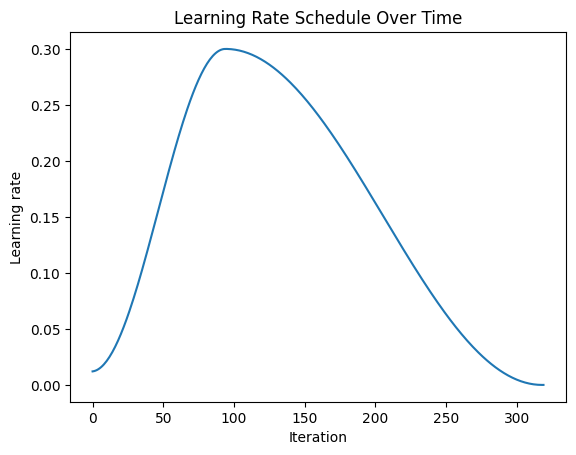

In [42]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=lr*3, steps_per_epoch=len(data_loader), epochs=10
)

lr_list = []
for epoch in range(10):
    for batch in data_loader:
        optimizer.step()
        scheduler.step()
        lr_list.append(scheduler.get_last_lr())
plt.plot(lr_list)
# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Learning rate')
plt.title('Learning Rate Schedule Over Time')

# Display the plot
plt.show()

### StepLR

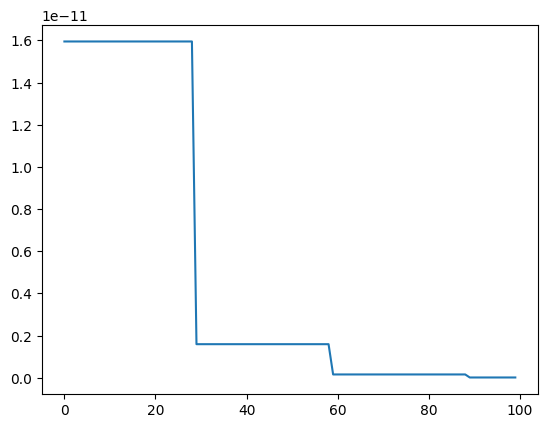

In [29]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
step_lr_list = []
for epoch in range(100):
    scheduler.step()
    step_lr_list.append(scheduler.get_last_lr())
plt.plot(step_lr_list)

### Cosine Annealing with Warm Restarts

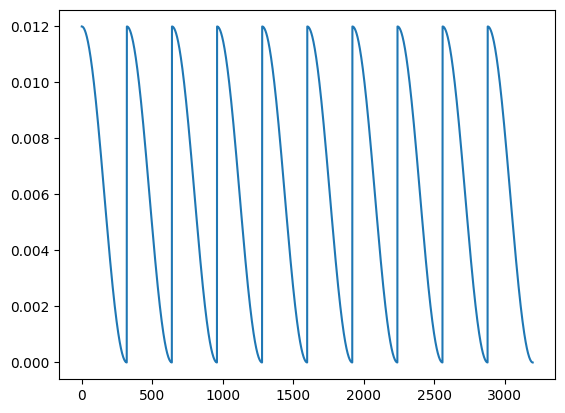

In [31]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1)
iters = len(data_loader)
lr_list = []
for epoch in range(100):
    for i, sample in enumerate(data_loader):
        optimizer.step()
        scheduler.step(epoch + i / iters)
        lr_list.append(scheduler.get_last_lr())
plt.plot(lr_list)

### CyclicLR

/Users/garethdavies/Development/workspaces/nnts/venv/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


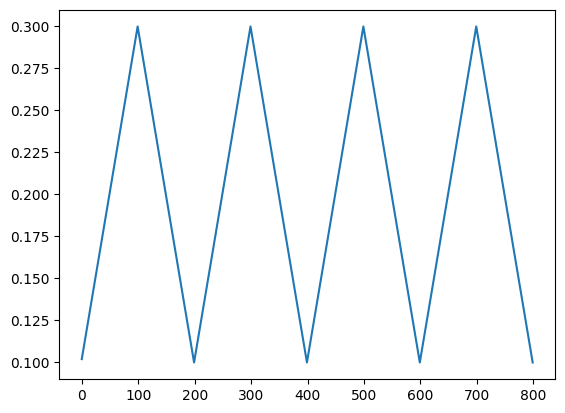

In [38]:
torch.optim.lr_scheduler.CyclicLR
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=lr, max_lr=lr*3, step_size_up=100)
lr_list = []
for epoch in range(25):
    for batch in data_loader:
        scheduler.step()
        lr_list.append(scheduler.get_last_lr())
plt.plot(lr_list)

In [ ]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
step_lr_list = []
for epoch in range(100):
    scheduler.step()
    step_lr_list.append(scheduler.get_last_lr())
plt.plot(step_lr_list)

scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=10, T_mult=1
)
iters = len(data_loader)
lr_list = []
for epoch in range(100):
    for i, sample in enumerate(data_loader):
        optimizer.step()
        scheduler.step(epoch + i / iters)
        lr_list.append(scheduler.get_last_lr())
plt.plot(lr_list)


torch.optim.lr_scheduler.CyclicLR
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.CyclicLR(
    optimizer, base_lr=lr, max_lr=lr * 3, step_size_up=100
)
lr_list = []
for epoch in range(25):
    for batch in data_loader:
        scheduler.step()
        lr_list.append(scheduler.get_last_lr())
plt.plot(lr_list)

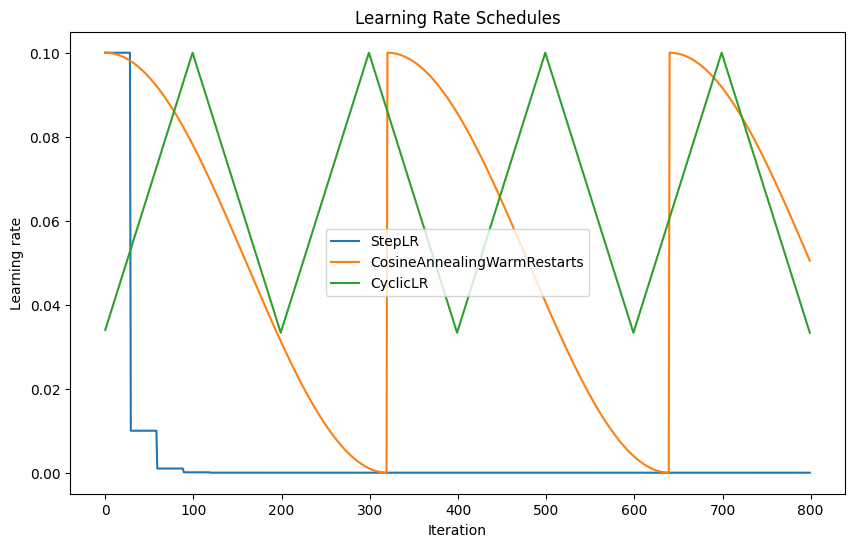

In [48]:
import torch
import matplotlib.pyplot as plt

# Assuming `model`, `lr`, and `data_loader` are already defined
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# StepLR
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
step_lr_list = []
for epoch in range(25 * len(data_loader)):
    scheduler.step()
    step_lr_list.append(scheduler.get_last_lr())

# CosineAnnealingWarmRestarts
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=10, T_mult=1
)
cosine_lr_list = []
iters = len(data_loader)
for epoch in range(25):
    for i, sample in enumerate(data_loader):
        optimizer.step()
        scheduler.step(epoch + i / iters)
        cosine_lr_list.append(scheduler.get_last_lr())

# CyclicLR
scheduler = torch.optim.lr_scheduler.CyclicLR(
    optimizer, base_lr=lr / 3, max_lr=lr, step_size_up=100
)
cyclic_lr_list = []
for epoch in range(25):
    for batch in data_loader:
        scheduler.step()
        cyclic_lr_list.append(scheduler.get_last_lr())

# Flatten the lists of learning rates
step_lr_list_flat = [item for sublist in step_lr_list for item in sublist]
cosine_lr_list_flat = [item for sublist in cosine_lr_list for item in sublist]
cyclic_lr_list_flat = [item for sublist in cyclic_lr_list for item in sublist]

# Plot all learning rates on the same plot
plt.figure(figsize=(10, 6))

plt.plot(step_lr_list_flat, label="StepLR")
plt.plot(cosine_lr_list_flat, label="CosineAnnealingWarmRestarts")
plt.plot(cyclic_lr_list_flat, label="CyclicLR")

# Add labels, title, and legend
plt.xlabel("Iteration")
plt.ylabel("Learning rate")
plt.title("Learning Rate Schedules")
plt.legend()

# Display the plot
plt.show()

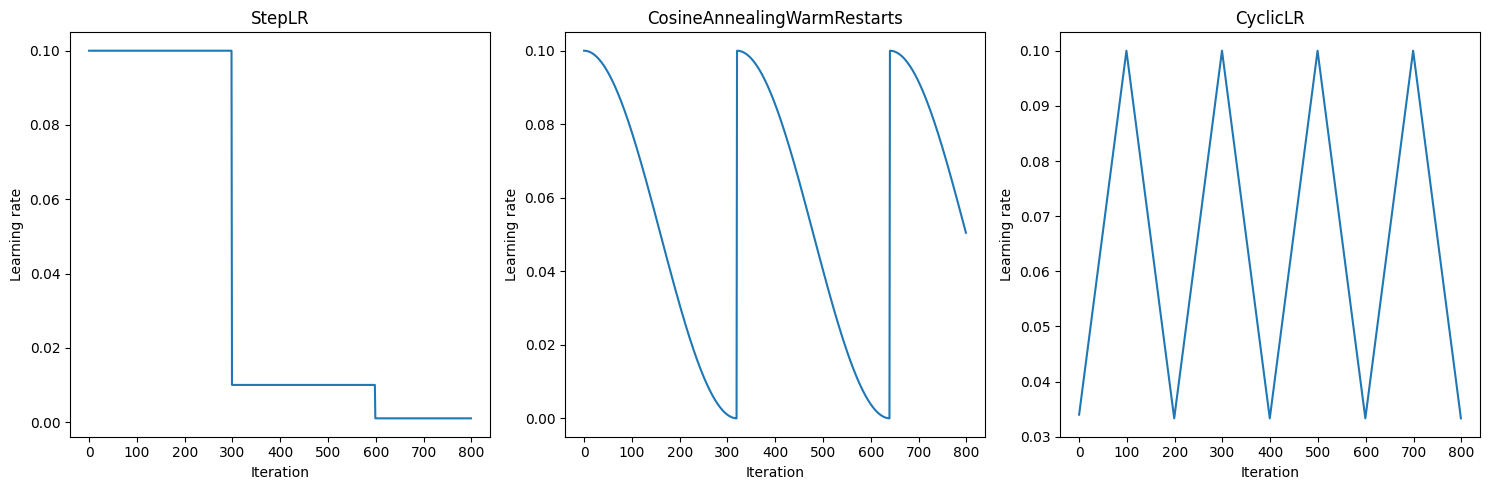

In [56]:
import torch
import matplotlib.pyplot as plt

# Assuming `model`, `lr`, and `data_loader` are already defined
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# StepLR
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.1)
step_lr_list = []
for epoch in range(25 * len(data_loader)):
    scheduler.step()
    step_lr_list.append(scheduler.get_last_lr())

# Flatten the list of learning rates
step_lr_list_flat = [item for sublist in step_lr_list for item in sublist]

# Plot StepLR
axs[0].plot(step_lr_list_flat)
axs[0].set_title("StepLR")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Learning rate")

# CosineAnnealingWarmRestarts
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=10, T_mult=1
)
cosine_lr_list = []
iters = len(data_loader)
for epoch in range(25):
    for i, sample in enumerate(data_loader):
        optimizer.step()
        scheduler.step(epoch + i / iters)
        cosine_lr_list.append(scheduler.get_last_lr())

# Flatten the list of learning rates
cosine_lr_list_flat = [item for sublist in cosine_lr_list for item in sublist]

# Plot CosineAnnealingWarmRestarts
axs[1].plot(cosine_lr_list_flat)
axs[1].set_title("CosineAnnealingWarmRestarts")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Learning rate")

# CyclicLR
scheduler = torch.optim.lr_scheduler.CyclicLR(
    optimizer, base_lr=lr /3, max_lr=lr, step_size_up=100
)
cyclic_lr_list = []
for epoch in range(25):
    for batch in data_loader:
        scheduler.step()
        cyclic_lr_list.append(scheduler.get_last_lr())

# Flatten the list of learning rates
cyclic_lr_list_flat = [item for sublist in cyclic_lr_list for item in sublist]

# Plot CyclicLR
axs[2].plot(cyclic_lr_list_flat)
axs[2].set_title("CyclicLR")
axs[2].set_xlabel("Iteration")
axs[2].set_ylabel("Learning rate")

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()